In [40]:
# Data handling and numerical operations
import pandas as pd                                 # Data manipulation and analysis
import numpy as np                                  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt                     # Plotting graphs
import seaborn as sns                               # Advanced data visualization

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords                   # Stopwords in text processing
from nltk.stem.porter import PorterStemmer          # Stemming words
import re                                           # Regular expression operations
from wordcloud import WordCloud, STOPWORDS          # Generating word cloud visualizations

# Text vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Scikit-learn
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline

# Utility libraries
import chardet                                      # Detecting character encoding
from collections import Counter
from scipy.sparse import hstack                # Handling collections of data

from urllib.parse import urlparse                   # parsing base url values
%matplotlib inline
# Downloading NLTK resources
# nltk.download('stopwords')

In [41]:
# Reading the stored data
df = pd.read_feather("../Data/Full_Data.feather")

## Feature Generation 

## Bag of words

In [42]:
X = df['text']
Y = df['sentiment']

In [43]:
# Generating bow features
stop_words_appened=stopwords.words('english').append(['rt', 'ep'])
vectorizer = CountVectorizer(stop_words=stop_words_appened)
X_bow = vectorizer.fit_transform(X)

## Inverse Word Frequence Vectors

In [44]:
# Generating TFIDF features
vectorizer = TfidfVectorizer(stop_words=stop_words_appened, max_features=1000)
X_tf = vectorizer.fit_transform(X)
X_tf

<28468x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 182613 stored elements in Compressed Sparse Row format>

## Train Test Split

In [45]:
# Splitting training and Test datasets
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, Y, test_size=0.2, random_state=40)
X_train_tf, X_test_tf, y_train, y_test = train_test_split(X_tf, Y, test_size=0.2, random_state=40)

## Model Training with unbalanced data

In [46]:
# using bag of words feature
tree_bow = tree.DecisionTreeClassifier(random_state=40)
tree_bow.fit(X_train_bow, y_train)
y_pred_bow = tree_bow.predict(X_test_bow)
tree_bow.score(X_test_bow, y_test)

0.8647699332630839

In [47]:
# confusion matrix generation
cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_bow

array([[ 467,  110,   92],
       [  55, 2911,  213],
       [  79,  221, 1546]])

In [48]:
# printing confusion matrix
def plot_conf_mat(cm):
    class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, labels=[-1,0,1])
    plt.yticks(tick_marks, labels=class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

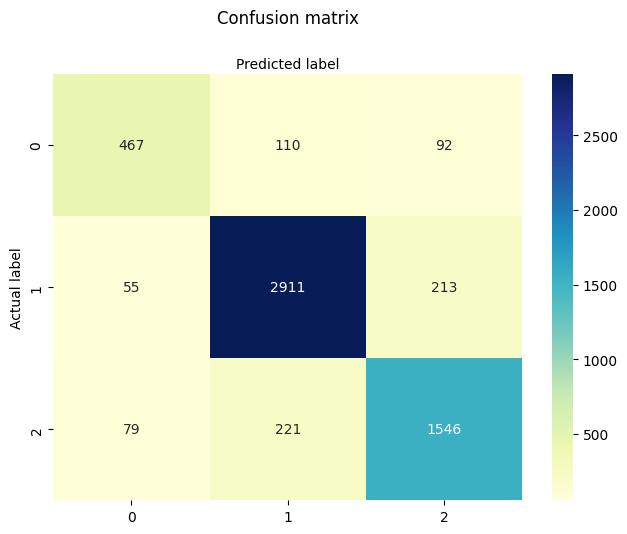

In [49]:
# plotting confusion matrix
plot_conf_mat(cm_bow)

In [50]:
# printing classification report
print(classification_report(y_test, y_pred_bow, labels=[-1,0,1], target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.78      0.70      0.74       669
     Neutral       0.90      0.92      0.91      3179
    Positive       0.84      0.84      0.84      1846

    accuracy                           0.86      5694
   macro avg       0.84      0.82      0.83      5694
weighted avg       0.86      0.86      0.86      5694



### The negative class has lower f1 score which indicates that this bow based regressor is not good at separating/classifying negative sentiments and usually classify those as neutrals. This bow based regressor has an accuracy of 91%

In [51]:
# using tfidf feature
tree_tf = tree.DecisionTreeClassifier(random_state=40)
tree_tf.fit(X_train_tf, y_train)
y_pred_tf = tree_tf.predict(X_test_tf)
tree_tf.score(X_test_tf, y_test)

0.8308746048472075

In [52]:
# confusion matrix
cm_tf = confusion_matrix(y_test, y_pred_tf)
cm_tf

array([[ 439,  130,  100],
       [ 122, 2832,  225],
       [ 102,  284, 1460]])

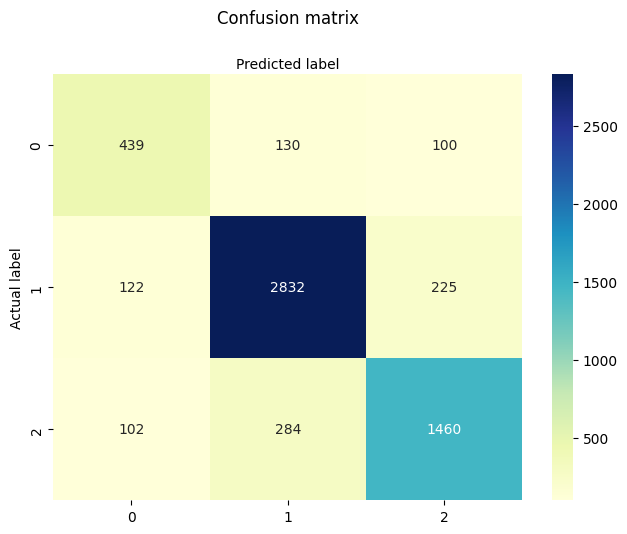

In [53]:
# plotting confusion matrix
plot_conf_mat(cm_tf)

In [54]:
# printing classification report
print(classification_report(y_test, y_pred_tf, labels=[-1,0,1], target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.66      0.66      0.66       669
     Neutral       0.87      0.89      0.88      3179
    Positive       0.82      0.79      0.80      1846

    accuracy                           0.83      5694
   macro avg       0.78      0.78      0.78      5694
weighted avg       0.83      0.83      0.83      5694



### The negative class has lower f1 score which indicates that this TFIDF based regressor is also not very efficient at separating/classifying negative sentiments and usually miss classify those as neutrals. This TFIDF based regressor has an overall accuracy of 87%

In [55]:
## Model Training with model class balance option
# using bag of words feature
tree_bow = tree.DecisionTreeClassifier(random_state=40, class_weight='balanced')
tree_bow.fit(X_train_bow, y_train)
y_pred_bow = tree_bow.predict(X_test_bow)
tree_bow.score(X_test_bow, y_test)

0.8677555321390937

In [56]:
cm_bow = confusion_matrix(y_test, y_pred_bow)
cm_bow

array([[ 513,   83,   73],
       [ 103, 2881,  195],
       [ 114,  185, 1547]])

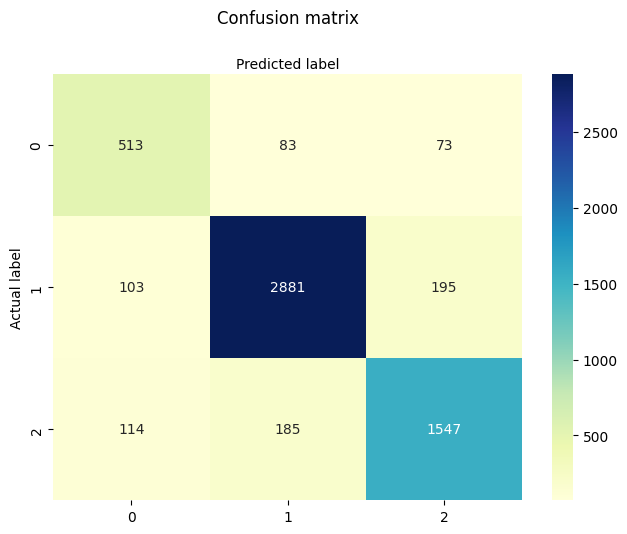

In [57]:
plot_conf_mat(cm_bow)

In [58]:
# printing classification report
print(classification_report(y_test, y_pred_bow, labels=[-1,0,1], target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.70      0.77      0.73       669
     Neutral       0.91      0.91      0.91      3179
    Positive       0.85      0.84      0.85      1846

    accuracy                           0.87      5694
   macro avg       0.82      0.84      0.83      5694
weighted avg       0.87      0.87      0.87      5694



### By training the bow Regressor with balanced dataset, the f1 score of negative class incerased  by 3%. Also the accuracy increased marginally by 0.4%. This means that the classifier is now returing the negative sentiments more oftenly although the precision has decresed.

In [59]:
# using tfidf feature with balanced option
tree_tf = tree.DecisionTreeClassifier(random_state=50, class_weight='balanced')
tree_tf.fit(X_train_tf, y_train)
y_pred_tf = tree_tf.predict(X_test_tf)
tree_tf.score(X_test_tf, y_test)

0.8247277836318933

In [60]:
# confusion matrix
cm_tf = confusion_matrix(y_test, y_pred_tf)
cm_tf

array([[ 455,  123,   91],
       [ 156, 2784,  239],
       [ 117,  272, 1457]])

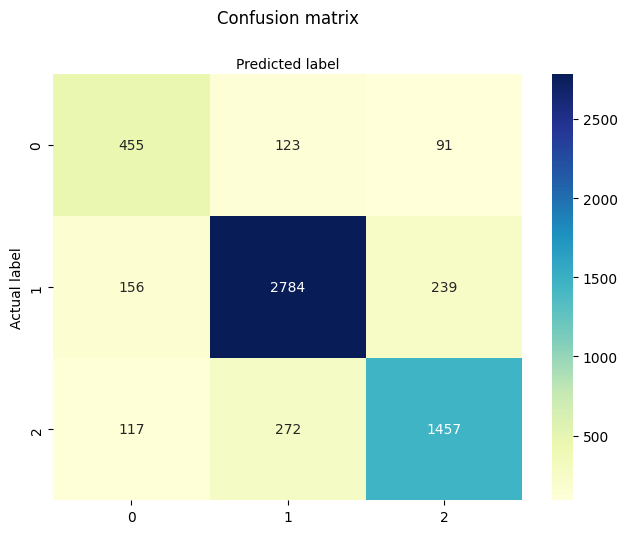

In [61]:
plot_conf_mat(cm_tf)

In [62]:
# printing classification report
print(classification_report(y_test, y_pred_tf, labels=[-1,0,1], target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.62      0.68      0.65       669
     Neutral       0.88      0.88      0.88      3179
    Positive       0.82      0.79      0.80      1846

    accuracy                           0.82      5694
   macro avg       0.77      0.78      0.78      5694
weighted avg       0.83      0.82      0.83      5694



### By training the TFIDF Regressor with balanced dataset, the f1 score of negative class has decreased . Also the accuracy decreased by 4%. This classifier is now good compared to others trained earlier

# ROC Curve 

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise.’ In other words, it shows the performance of a classification model at all classification thresholds. The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.
The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes.

In [63]:
# ROC with one vs rest multiclass
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(5694, 3)

In [64]:
# labels to binary
label_binarizer.transform([-1])

array([[1, 0, 0]])

In [65]:
# ROC curve showing an individual class
class_of_interest = 0 # neutral sentiment class
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
y_score = tree_tf.predict_proba(X_test_tf)
class_id

1

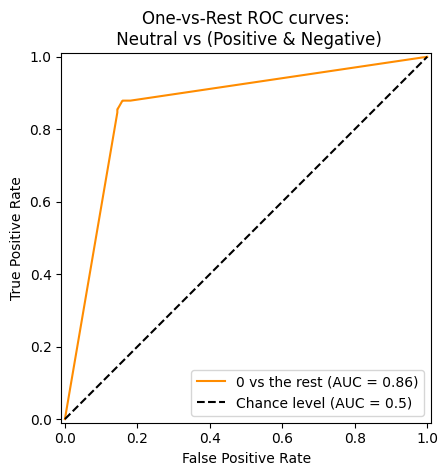

In [66]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\n Neutral vs (Positive & Negative)",
)

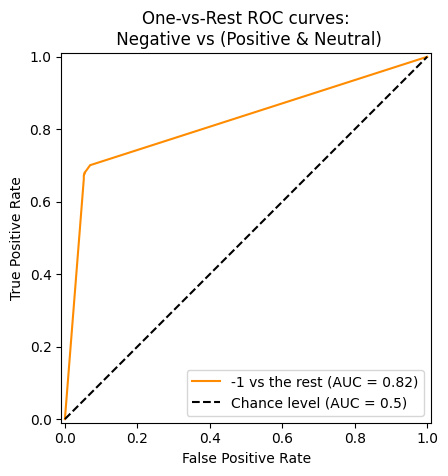

In [67]:
# for negative sentiments
# ROC curve showing an individual class
class_of_interest = -1 # negative sentiment class
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\n Negative vs (Positive & Neutral)",
)

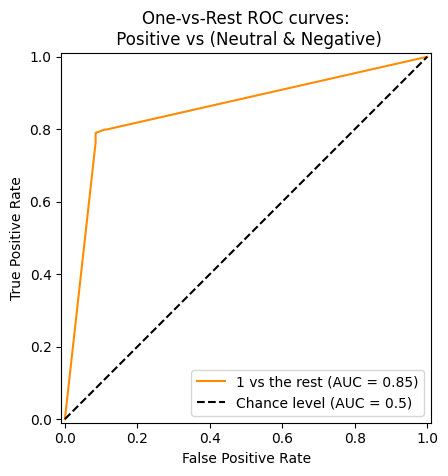

In [68]:
# for positive sentiments
# ROC curve showing an individual class
class_of_interest = 1 # negative sentiment class
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\n Positive vs (Neutral & Negative)",
)

## Roc Micro Averaged for TFIDF
##### Micro-averaging aggregates the contributions from all the classes (using numpy.ravel) to compute the average metrics. In a multi-class classification setup with highly imbalanced classes, micro-averaging is preferred.

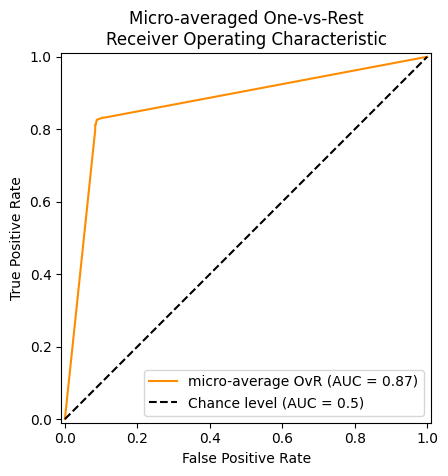

In [69]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)

In [70]:
# computing ROC-AUC score
micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_score,
    multi_class="ovr",
    average="micro",
)
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr}")

Micro-averaged One-vs-Rest ROC AUC score:
0.8704936728054069


## Word2Vec embeddings for sentiments

Word2Vec creates vectors of the words that are distributed numerical representations of word features – these word features could comprise of words that represent the context of the individual words present in our vocabulary. Word embeddings eventually help in establishing the association of a word with another similar meaning word through the created vectors.

In [71]:
# install gensim and then use it
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [73]:
# Preprocess text data for Word2Vec
X_train_preprocessed = [simple_preprocess(text) for text in X_train]
X_test_preprocessed = [simple_preprocess(text) for text in X_test]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=X_train_preprocessed, vector_size=100, window=10, min_count=1, workers=4)

In [74]:
# Function to get average word vectors for a text
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    n_words = 0.
    for word in words:
        if word in vocabulary:
            n_words = n_words + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    if n_words:
        feature_vector = np.divide(feature_vector, n_words)
    return feature_vector


In [75]:
# Get average word vectors for train and test sets
X_train_w2v = [average_word_vectors(words, w2v_model, w2v_model.wv.index_to_key, 100) for words in X_train_preprocessed]
X_test_w2v = [average_word_vectors(words, w2v_model, w2v_model.wv.index_to_key, 100) for words in X_test_preprocessed]


In [76]:
# using tfidf feature with balanced option
tree_w2v = tree.DecisionTreeClassifier(random_state=50, class_weight='balanced')
tree_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = tree_w2v.predict(X_test_w2v)
tree_w2v.score(X_test_w2v, y_test)

0.6979276431331226

In [77]:
# Create a pipeline for logistic regression
pipeline = Pipeline([
    ('clf', tree.DecisionTreeClassifier())
])
# Train the logistic regression model
pipeline.fit(X_train_w2v, y_train)
# Predictions
y_pred = pipeline.predict(X_test_w2v)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7019669827889006
Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.46      0.45       699
           0       0.79      0.78      0.79      3223
           1       0.64      0.65      0.65      1772

    accuracy                           0.70      5694
   macro avg       0.63      0.63      0.63      5694
weighted avg       0.70      0.70      0.70      5694

Confusion Matrix:
[[ 319  231  149]
 [ 206 2525  492]
 [ 185  434 1153]]


In [78]:
cm_tf = confusion_matrix(y_test, y_pred)
cm_tf

array([[ 319,  231,  149],
       [ 206, 2525,  492],
       [ 185,  434, 1153]])

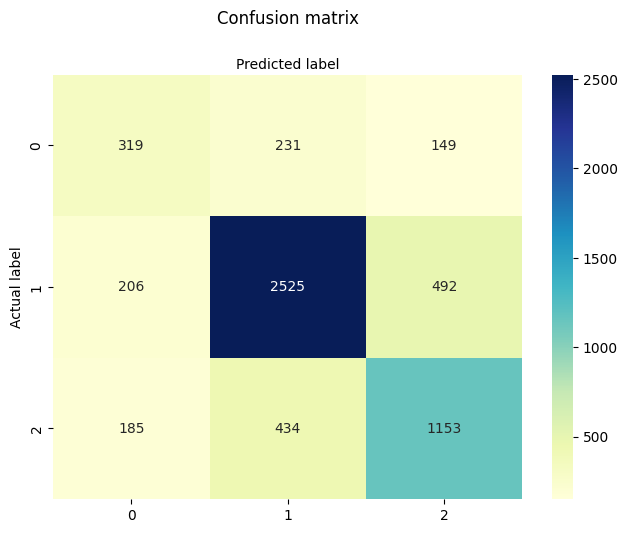

In [79]:
plot_conf_mat(cm_tf)

In [80]:
# printing classification report
print(classification_report(y_test, y_pred, labels=[-1,0,1], target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.45      0.46      0.45       699
     Neutral       0.79      0.78      0.79      3223
    Positive       0.64      0.65      0.65      1772

    accuracy                           0.70      5694
   macro avg       0.63      0.63      0.63      5694
weighted avg       0.70      0.70      0.70      5694



### By training the Regressor with word2vec features, the f1 score of negative class has decreased substantially (51%). Also the accuracy has decreased to 76%. This indicates that the word2vec features are not good for this dataset and the words vectors are lying in close proximity that classifier is not able to differentiate.

# K-Fold Cross Validation

K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This method aids in model assessment, selection, and hyperparameter tuning, providing a more reliable measure of a model’s effectiveness.

Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs.

In [81]:
# evaluate a model with a given number of repeats
def evaluate_model(X, y, repeats):
	# prepare the cross-validation procedure
    tree1 = tree.DecisionTreeClassifier(random_state=50)
    # prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    # evaluate model
    scores = cross_val_score(tree1, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

>1 mean=0.8744 se=0.002
>2 mean=0.8735 se=0.001
>3 mean=0.8732 se=0.001
>4 mean=0.8737 se=0.001
>5 mean=0.8737 se=0.001
>6 mean=0.8734 se=0.001
>7 mean=0.8733 se=0.001
>8 mean=0.8730 se=0.001
>9 mean=0.8730 se=0.001


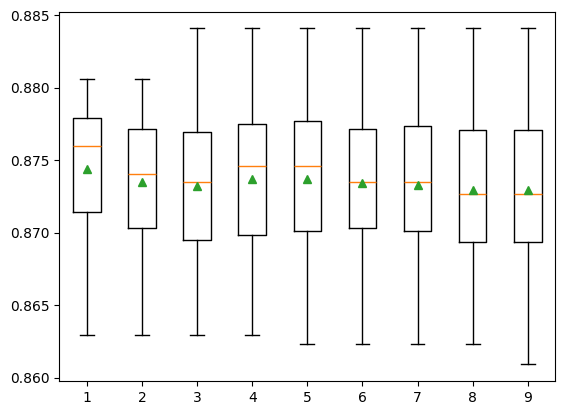

In [82]:
repeats = range(1,10)
results = list()
from scipy.stats import sem
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X_bow, Y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

The above results show K-Fold cross validation results for the logistic regressor with k=10. The k-fold is repeated various times (from 1 to 10). The whole is repeated 10 times. For each iteration of experiemnt we can see the accuracy score distribution as a box and whisker plot. The green triangle shows arithmetic mean of the experimente and orange show the median value. With BOW features the accuracy settles around 91.54%
These are the best results for this dataset.

>1 mean=0.8403 se=0.002
>2 mean=0.8396 se=0.002
>3 mean=0.8389 se=0.001
>4 mean=0.8387 se=0.001
>5 mean=0.8386 se=0.001
>6 mean=0.8384 se=0.001
>7 mean=0.8384 se=0.001
>8 mean=0.8384 se=0.001
>9 mean=0.8382 se=0.001


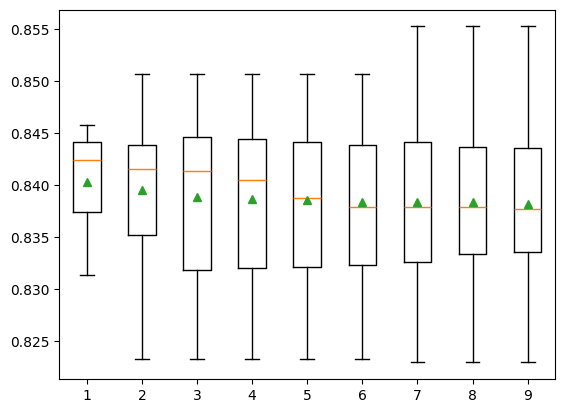

In [83]:
repeats = range(1,10)
results = list()
for r in repeats:
	# evaluate using a given number of repeats
	scores = evaluate_model(X_tf, Y, r)
	# summarize
	print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), sem(scores)))
	# store
	results.append(scores)
# plot the results
plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

The above results show K-Fold cross validation results for the logistic regressor with k=10. The k-fold is repeated various times (from 1 to 10). The whole is repeated 10 times. For each iteration of experiemnt we can see the accuracy score distribution as a box and whisker plot. The green triangle shows arithmetic mean of the experimente and orange show the median value. With TFIDF features the accuracy settles around 87.83%

## Hyper parameter tunning of Decision Trees

## Grid Search

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
tree_gdcv = tree.DecisionTreeClassifier(random_state=43)
params = {'max_depth':[15,30,60,90],
          'min_samples_leaf':[2,3,5,10,15],
          'min_samples_split':[3,5,8,10,12],
          'criterion':['gini','entropy']}
GS = GridSearchCV(estimator=tree_gdcv,param_grid=params,cv=10,n_jobs=-1, verbose=True, scoring='accuracy')

In [86]:
GS.fit(X_bow, Y)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=43),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [15, 30, 60, 90],
                         'min_samples_leaf': [2, 3, 5, 10, 15],
                         'min_samples_split': [3, 5, 8, 10, 12]},
             scoring='accuracy', verbose=True)

In [87]:
print('Best Parameters:',GS.best_params_,end='\n\n')
print('Best Score:',GS.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 90, 'min_samples_leaf': 3, 'min_samples_split': 12}

Best Score: 0.8194647939750416


## RandomizedSearch CV

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [89]:
tree_RS = tree.DecisionTreeClassifier(random_state=43)
params = {'max_depth':[3,5,7,10,15,30, 60, 120],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}
RS = RandomizedSearchCV(estimator=tree_RS,param_distributions=params,cv=10,n_iter=300,n_jobs=-1, verbose=True, scoring='accuracy')

In [90]:
RS.fit(X_bow, Y)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=43),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, 15, 30, 60,
                                                      120],
                                        'min_samples_leaf': [3, 5, 10, 15, 20],
                                        'min_samples_split': [8, 10, 12, 18, 20,
                                                              16]},
                   scoring='accuracy', verbose=True)

In [91]:
print('Best Parameters:',RS.best_params_,end='\n\n')
print('Best Score:',RS.best_score_)

Best Parameters: {'min_samples_split': 18, 'min_samples_leaf': 3, 'max_depth': 120, 'criterion': 'gini'}

Best Score: 0.8238203669407282
